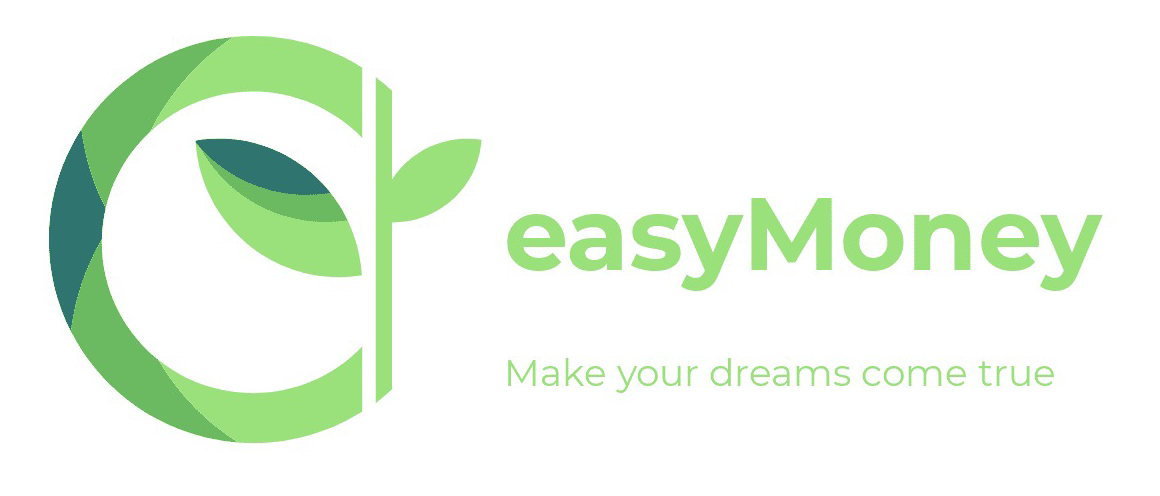

Explicación de la compañía

Y objetivos de la 1º tarea

# 1 EDA y TAREA 1 (Análisis)

## Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gc

plt.style.use("seaborn-pastel")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import data

In [ ]:
#__PATH__ = "/content/drive/MyDrive/Master Data Science/Capstone"
__PATH__ = "/content/drive/MyDrive/Nuclio - Data Science/CAPSTONE/00_data_easymoney/data"

# Lorena /content/drive/MyDrive/Nuclio - Data Science/CAPSTONE/00_data_easymoney/data
# Alfredo /content/drive/MyDrive/colab_notebooks/easy-money/data/raw # ../data/raw
# Andrea /content/drive/MyDrive/Master DataScience/Capstone

#__INTERIM_DATA_PATH__ = "/content/drive/MyDrive/colab_notebooks/easy-money/data/interim"
__INTERIM_DATA_PATH__ = "/content/drive/MyDrive/Nuclio - Data Science/CAPSTONE/00_data_easymoney/data"
# Lorena /content/drive/MyDrive/Nuclio - Data Science/CAPSTONE/00_data_easymoney/data
# Alfredo /content/drive/MyDrive/colab_notebooks/easy-money/data/interim # ../data/interim
# Andrea /content/drive/MyDrive/Master DataScience/Capstone

In [ ]:
_commercial_df = pd.read_csv(f"{__PATH__}/commercial_activity_df.csv", sep=",")
_products_df = pd.read_csv(f"{__PATH__}/products_df.csv", sep=",")
_sociodemographic_df = pd.read_csv(f"{__PATH__}/sociodemographic_df.csv", sep=",")

In [ ]:
del (_commercial_df["Unnamed: 0"])
del (_products_df["Unnamed: 0"])
del (_sociodemographic_df["Unnamed: 0"])

# 1. Data understanding - Estructura de datos

## 1.1 Tamaño del dataset (tamaño en memoria, número de registros y atributos, etc)

*   Vemos que el dataset de Commercial Activity tiene 7 columnas de las cuales hay 3 atributos numéricos y 4 objetos. 
*   Vemos que el dataset de Productos tiene 18 columnas de las cuales hay 17 atributos numéricos y 1 objeto.
*   Vemos que el dataset de Sociodemographic tiene 9 columnas de las cuales hay 5 atributos numéricos y 4 objetos.

In [ ]:
#Para ver la información resumida de los datasets 
#Viendo cuántas columnas hay y los tipos de valores que contienen. 

In [ ]:
_commercial_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Columns: 6 entries, pk_cid to segment
dtypes: float64(1), int64(1), object(4)
memory usage: 273.0+ MB


In [ ]:
_products_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Columns: 17 entries, pk_cid to em_acount
dtypes: float64(2), int64(14), object(1)
memory usage: 773.4+ MB


In [ ]:

_sociodemographic_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Columns: 8 entries, pk_cid to salary
dtypes: float64(2), int64(2), object(4)
memory usage: 363.9+ MB


## 1.2. Visualización directa de los datos (head)

In [ ]:
#Visualización de las primeras filas, de todas las columnas
_commercial_df.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO


In [ ]:
_products_df.head()

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1
3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,0
4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0,1


In [ ]:
_sociodemographic_df.head()

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,ES,29.0,H,35,N,87218.10
1,1050611,2018-01-28,ES,13.0,V,23,N,35548.74
2,1050612,2018-01-28,ES,13.0,V,23,N,122179.11
3,1050613,2018-01-28,ES,50.0,H,22,N,119775.54
4,1050614,2018-01-28,ES,50.0,V,23,N,NaN


## 1.3. Tipo de atributos disponibles (numéricos, categóricos)

In [ ]:
#Para ver la información extendida de los datasets 
_commercial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 273.0+ MB


In [ ]:
_products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_cid              int64  
 1   pk_partition        object 
 2   short_term_deposit  int64  
 3   loans               int64  
 4   mortgage            int64  
 5   funds               int64  
 6   securities          int64  
 7   long_term_deposit   int64  
 8   em_account_pp       int64  
 9   credit_card         int64  
 10  payroll             float64
 11  pension_plan        float64
 12  payroll_account     int64  
 13  emc_account         int64  
 14  debit_card          int64  
 15  em_account_p        int64  
 16  em_acount           int64  
dtypes: float64(2), int64(14), object(1)
memory usage: 773.4+ MB


In [ ]:
_sociodemographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(2), int64(2), object(4)
memory usage: 363.9+ MB


## Unificar data

In [ ]:
#Utilizamos para unir, la columna pk_cid (Identificador de cliente) y pk_partition (Fecha de ingesta de los datos)

In [ ]:
df_1 = pd.merge(left=_commercial_df, right=_sociodemographic_df, how="inner", on=["pk_cid", "pk_partition"])
df = pd.merge(left=df_1, right=_products_df, how="inner", on=["pk_cid", "pk_partition"])

In [ ]:
df.head()

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,...,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-28,2018-01-12,KHL,1.0,02 - PARTICULARES,ES,29.0,H,35,...,0,0,0,0.0,0.0,0,0,0,0,1
1,1050611,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,ES,13.0,V,23,...,0,0,0,0.0,0.0,0,0,0,0,1
2,1050612,2018-01-28,2015-08-10,KHE,0.0,03 - UNIVERSITARIO,ES,13.0,V,23,...,0,0,0,0.0,0.0,0,0,0,0,1
3,1050613,2018-01-28,2015-08-10,KHD,0.0,03 - UNIVERSITARIO,ES,50.0,H,22,...,0,0,0,0.0,0.0,0,0,0,0,0
4,1050614,2018-01-28,2015-08-10,KHE,1.0,03 - UNIVERSITARIO,ES,50.0,V,23,...,0,0,0,0.0,0.0,0,0,0,0,1


In [ ]:
df.shape

(5962924, 27)

## 1.4. Estadísticos descriptivos (valores medios, dispersión, percentiles, etc.)

In [ ]:
#Para mostrar solo los números
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
pk_cid,5962924.0,1.234930e+06,162302.043492,15891.00,1112532.00,1231097.00,1352339.00,1553689.00
active_customer,5962924.0,4.033845e-01,0.490577,0.00,0.00,0.00,1.00,1.00
region_code,5960660.0,2.581440e+01,13.595664,1.00,13.00,28.00,36.00,52.00
age,5962924.0,2.976042e+01,11.980376,2.00,22.00,25.00,34.00,105.00
salary,4450821.0,1.158167e+05,199551.889046,1202.73,61500.63,88654.65,131669.91,28894395.51
short_term_deposit,5962924.0,2.581619e-03,0.050744,0.00,0.00,0.00,0.00,1.00
loans,5962924.0,7.848498e-05,0.008859,0.00,0.00,0.00,0.00,1.00
mortgage,5962924.0,5.433576e-05,0.007371,0.00,0.00,0.00,0.00,1.00
funds,5962924.0,3.370662e-03,0.057959,0.00,0.00,0.00,0.00,1.00
securities,5962924.0,3.711770e-03,0.060811,0.00,0.00,0.00,0.00,1.00


In [ ]:
#Para mostrar solo los atributos categóricos.
#Se pueden ver el número de etiquetas que hay (columna unique)
df.describe(exclude=np.number).T

,count,unique,top,freq
pk_partition,5962924,17,2019-05-28,442995
entry_date,5962924,1499,2017-07-28,57389
entry_channel,5829891,68,KHE,3113947
segment,5828980,3,03 - UNIVERSITARIO,3900166
country_id,5962924,41,ES,5960672
gender,5962899,2,H,3087502
deceased,5962924,2,N,5961849


## 1.5 Número de valores nulos

Más adelante veremos qué tratamiento realizaremos para cada nulo

In [ ]:
#Para sumar y así saber cuántos nulos hay por cada columna/atributo
df.isnull().sum()

pk_cid                      0
pk_partition                0
entry_date                  0
entry_channel          133033
active_customer             0
segment                133944
country_id                  0
region_code              2264
gender                     25
age                         0
deceased                    0
salary                1512103
short_term_deposit          0
loans                       0
mortgage                    0
funds                       0
securities                  0
long_term_deposit           0
em_account_pp               0
credit_card                 0
payroll                    61
pension_plan               61
payroll_account             0
emc_account                 0
debit_card                  0
em_account_p                0
em_acount                   0
dtype: int64

In [ ]:
#Para ver si hay nulos viéndolo específiciamente en los atributos numéricos. (Con include = np.number se indica que lo muestre de los numéricos)
df.select_dtypes(include=np.number).isnull().sum()

pk_cid                      0
active_customer             0
region_code              2264
age                         0
salary                1512103
short_term_deposit          0
loans                       0
mortgage                    0
funds                       0
securities                  0
long_term_deposit           0
em_account_pp               0
credit_card                 0
payroll                    61
pension_plan               61
payroll_account             0
emc_account                 0
debit_card                  0
em_account_p                0
em_acount                   0
dtype: int64

In [ ]:

#Para ver si hay nulos en los atributos categóricos
df.select_dtypes(exclude=np.number).isnull().sum()

pk_partition          0
entry_date            0
entry_channel    133033
segment          133944
country_id            0
gender               25
deceased              0
dtype: int64

## Transformar fechas

Obteníamos un error al convertir nuestra variable a fecha debido a las fechas correspondientes al **29 de Febrero** de los años 2015 y 2019 puesto que no existen. Por este motivo, decidimos reemplazar estos valores por la fecha más cercana (día anterior)

In [ ]:
#Reemplazamos los valores de las fechas que no existen, por la fecha más cercana (día anterior)
df["entry_date"] = df["entry_date"].replace("2015-02-29", "2015-02-28")
df["entry_date"] = df["entry_date"].replace("2019-02-29", "2019-02-28")

In [ ]:
#Convertimos nuestra variable a "fecha" mediante el pd.to_datetime
df["entry_date"] = pd.to_datetime(df["entry_date"])

In [ ]:
#Generamos atributos extras a partir de pk_partition
df['entry_date_Month'] = df['entry_date'].dt.month.astype(int)
df['entry_date_Year'] = df['entry_date'].dt.year.astype(int)
df['entry_date_Week'] = df['entry_date'].dt.isocalendar().week.astype(int)
df['entry_date_Weekday'] = df['entry_date'].dt.weekday.astype(int)
df['entry_date_Trim'] = df['entry_date'].dt.quarter.astype(int)

In [ ]:
#Convertimos nuestra variable a "fecha" mediante el pd.to_datetime
df["pk_partition"] = pd.to_datetime(df["pk_partition"])

In [ ]:
#Generamos atributos extras a partir de pk_partition
df['pk_partition_Month'] = df['pk_partition'].dt.month.astype(int)
df['pk_partition_Year'] = df['pk_partition'].dt.year.astype(int)
df['pk_partition_Week'] = df['pk_partition'].dt.isocalendar().week.astype(int)
df['pk_partition_Weekday'] = df['pk_partition'].dt.weekday.astype(int)
df['pk_partition_Trim'] = df['pk_partition'].dt.quarter.astype(int)

#2. Exploratory Data Analysis - Análisis univariante de los datos


##2.1 Definición de funciones

Para agilizar el proceso, definimos una serie de funciones.
Las funciones son de visualización, tratamiento de nulos, exploración, etc

### Función para graficar los nulos.

Según el atributo con el que llamemos a esta función, mostraremos los nulos correspondientes.

In [ ]:
def graficar(dataframe):
    #creamos un dataframe para los nulos
    df_nulos = dataframe.isnull().sum().reset_index(name="Num_Nulos")
    df_nulos = df_nulos[df_nulos["Num_Nulos"] > 0].sort_values(by="Num_Nulos", ascending=False)
    df_nulos["Porcentaje"] = (df_nulos["Num_Nulos"] / dataframe.shape[0]) * 100

    plt.figure(figsize=[10, 8])
    ax = df_nulos.plot.bar(x="index", y="Num_Nulos", rot=10)
    plt.title("Cantidad de Nulos")
    plt.show()

    return df_nulos


### Función de detección de atributos con baja variabilidad

Vamos a crear una función que nos permita analizar los atributos con baja variabilidad. Es decir, aquellos dónde existe un valor único que representa el 99% de las instancias y por tanto dispone de una distribución sesgada y no resulta útil para el modelo.

In [ ]:
def skewness(dataframe):
    skewness_df = pd.DataFrame([{'Atributos': c, 'val_únicos': dataframe[c].nunique(),
                                 'Skewness': dataframe[c].value_counts(normalize=True).values[0] * 100} for c in
                                dataframe.columns])
    new_skewness = skewness_df[skewness_df["Skewness"] >= 90]
    skewness_df = skewness_df.sort_values('Skewness', ascending=False)
    print(new_skewness)
    return new_skewness

### Función para seleccionar las particiones

Seleccionar un periodo de tiempo y mostrar un gráfico sobre esta selección.

In [ ]:
#Selecciona particiones del dataframe
#   :param dataframe: dataframe a evaluar
#   :param from_partition: mes de inicio a evaluar desde 1 a 17
#   :param size: (optional, default=1) cantidad de particiones a mostrar
#   :return: dataframe particionado

def select_partition(dataframe: pd.DataFrame, from_partition: int, size: int = 1) -> pd.DataFrame:
    partitions = dataframe["pk_partition"].unique()
    from_partition = from_partition - 1
    to_partition = from_partition + size
    return dataframe[dataframe["pk_partition"].isin(partitions[from_partition: to_partition])]

### Funciones de visualización 

#### Visualización de booleanas (true/false, 0-1, si/no)


In [ ]:
#Gráfico de columnas
def plot_bool(dataframe, column):
    plt.title(column, fontsize=14, pad=30)
    sns.countplot(data=dataframe, x=column, palette=['#FF7AA2', "#C82065"])
    plt.xlabel('')
    plt.show()n

### Funciones para seleccionar "Others"

In [ ]:
#Función que nos permite reducir el número de etiquetas en las variables categóricas para facilitar su tratamiento a posteriori (posibles One Hot Encoding)
def other_selection(dataframe, column, num_values):
    _df = dataframe[column].value_counts().head(num_values)
    _df_list = _df.index.to_list()
    _df_list.append('Others')
    dataframe[column] = pd.Categorical(dataframe[column], categories=_df_list)
    return dataframe[column].fillna('Others')

### Funciones para conocer la información mensual

In [ ]:
#Función visualizar información mensual de suma, media y contador total de la variable con la que se utilice.
#Con esta función ya ordenamos de forma descendiente en base a la suma del atributo.
def info_mensual(dataframe: pd.DataFrame, column_name: str) -> pd.DataFrame:
    partition_df = dataframe[["pk_partition", column_name]].groupby("pk_partition").agg([sum, np.mean, len])
    return partition_df.sort_values(by=[(column_name, 'sum')], ascending=False)

In [ ]:
#Obtiene el máximo de meses consecutivos
#    :param serie: serie de booleanos que determinan si ese mes estuvo activo
#    :return: maximo de meses consecutivos
def get_max_consecutive(serie: pd.Series) -> int:
    counter = 0
    segments = [0]
    for i in serie:
        if i == 1:
            counter += 1
        elif counter > 0:
            segments.append(counter)
            counter = 0

    if counter > 0:
        segments.append(counter)

    return np.array(segments).max()

##2.2 Exploración del df

### Exploración genérica de todos los nulos del dataframe
Vemos la cantidad de nulos respecto al total que representa cada uno de los atributos.
Encontramos que salary es la variable con más nulos con un 25,35% de nulos.

<Figure size 720x576 with 0 Axes>

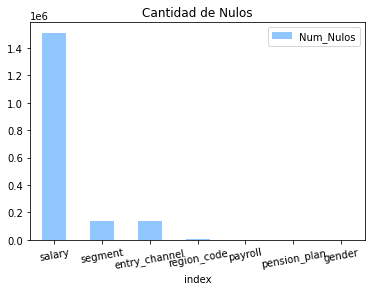

,index,Num_Nulos,Porcentaje
11,salary,1512103,25.358415
5,segment,133944,2.246281
3,entry_channel,133033,2.231003
7,region_code,2264,0.037968
20,payroll,61,0.001023
21,pension_plan,61,0.001023
8,gender,25,0.000419


In [ ]:
graficar(df)

### Exploración del dataset


In [ ]:
#Hacemos un len para ver cuantas columnas (y por lo tanto atributos) hay.
len(df.columns)

37

In [ ]:
#La mayoría de atributos no tienen una baja variabilidad
#Encontramos algunos atributos con baja variabilidad pero es porque son variables booleanas y por ello decidimos no eliminarlas.
skewness(df)

             Atributos  val_únicos    Skewness
6           country_id          41   99.962233
10            deceased           2   99.981972
12  short_term_deposit           2   99.741838
13               loans           2   99.992152
14            mortgage           2   99.994566
15               funds           2   99.662934
16          securities           2   99.628823
17   long_term_deposit           2   98.311902
18       em_account_pp           1  100.000000
19         credit_card           2   98.811556
20             payroll           2   96.548856
21        pension_plan           2   96.347359
22     payroll_account           2   94.475529
23         emc_account           2   94.516767
24          debit_card           2   90.558860
25        em_account_p           2   99.999430


,Atributos,val_únicos,Skewness
6,country_id,41,99.962233
10,deceased,2,99.981972
12,short_term_deposit,2,99.741838
13,loans,2,99.992152
14,mortgage,2,99.994566
15,funds,2,99.662934
16,securities,2,99.628823
17,long_term_deposit,2,98.311902
18,em_account_pp,1,100.000000
19,credit_card,2,98.811556


In [ ]:
#Buscamos cuáles son los campos que contienen nulos.
df.isnull().sum()

pk_cid                        0
pk_partition                  0
entry_date                    0
entry_channel            133033
active_customer               0
segment                  133944
country_id                    0
region_code                2264
gender                       25
age                           0
deceased                      0
salary                  1512103
short_term_deposit            0
loans                         0
mortgage                      0
funds                         0
securities                    0
long_term_deposit             0
em_account_pp                 0
credit_card                   0
payroll                      61
pension_plan                 61
payroll_account               0
emc_account                   0
debit_card                    0
em_account_p                  0
em_acount                     0
entry_date_Month              0
entry_date_Year               0
entry_date_Week               0
entry_date_Weekday            0
entry_da

In [ ]:
#Hacemos una lista que incluye los atributos con nulos por si fueran necesarios más adelante
nulos = ["entry_channel", "segment", "region_code", "gender", "salary", "payroll", "pension_plan"]

In [ ]:
#Comprobamos si el dataframe contiene registros duplicados
df[df.duplicated(keep=False)]

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,...,entry_date_Month,entry_date_Year,entry_date_Week,entry_date_Weekday,entry_date_Trim,pk_partition_Month,pk_partition_Year,pk_partition_Week,pk_partition_Weekday,pk_partition_Trim


In [ ]:
#Observamos el tipo de datos que contiene el data set
df.dtypes

pk_cid                           int64
pk_partition            datetime64[ns]
entry_date              datetime64[ns]
entry_channel                   object
active_customer                float64
segment                         object
country_id                      object
region_code                    float64
gender                          object
age                              int64
deceased                        object
salary                         float64
short_term_deposit               int64
loans                            int64
mortgage                         int64
funds                            int64
securities                       int64
long_term_deposit                int64
em_account_pp                    int64
credit_card                      int64
payroll                        float64
pension_plan                   float64
payroll_account                  int64
emc_account                      int64
debit_card                       int64
em_account_p             

In [ ]:
#Vemos el total de valores por cada 'ventana' (fecha de ingesta de los datos), es decir, según el atributo pk_partition
df['pk_partition'].value_counts()

2019-05-28    442995
2019-04-28    439627
2019-03-28    436183
2019-02-28    431727
2019-01-28    426875
2018-12-28    422481
2018-11-28    416387
2018-10-28    402300
2018-09-28    375323
2018-08-28    352922
2018-07-28    339339
2018-06-28    252104
2018-05-28    249926
2018-04-28    247463
2018-03-28    245258
2018-02-28    242521
2018-01-28    239493
Name: pk_partition, dtype: int64

#### Fechas



*   Entry_date
*   Pk_partition


##### **Entry_date**

*Fecha en la que realizó la primera contratación a través de easyMoney*

In [ ]:
#Investigar variable entry_date
#Mostramos de forma global, cuantos clientes se dieron de alta según la fecha de ingesta de los datos.
df["entry_date"].value_counts()

2017-07-28    57389
2017-10-03    54287
2017-08-04    45746
2016-10-14    40804
2016-08-03    33414
              ...  
2015-04-29       11
2016-06-15       11
2015-08-19       11
2018-05-31        9
2017-05-01        7
Name: entry_date, Length: 1497, dtype: int64

##### **Pk_partition**


*Fecha de ingesta de los datos*

Hay 17 particiones, que van desde enero de 2018 hasta mayo de 2019.

In [ ]:
#Hay 17 particiones, que van desde enero de 2018 hasta mayo de 2019.
df["pk_partition"].value_counts()

2019-05-28    442995
2019-04-28    439627
2019-03-28    436183
2019-02-28    431727
2019-01-28    426875
2018-12-28    422481
2018-11-28    416387
2018-10-28    402300
2018-09-28    375323
2018-08-28    352922
2018-07-28    339339
2018-06-28    252104
2018-05-28    249926
2018-04-28    247463
2018-03-28    245258
2018-02-28    242521
2018-01-28    239493
Name: pk_partition, dtype: int64

#### Categóricas
*   Pk_cid
*   Entry_channel
*   Segment
*   country_id
*   region_code



##### **Pk_cid**
*Identificador de cliente*

In [ ]:
#Clientes que llevan en la compañía desde el inicio de las 'particiones'. Aunque pueden ser activos o inactivos durante el período.
df["pk_cid"].value_counts().head(10)

1375586    17
1328781    17
1328783    17
1328784    17
1328786    17
1328787    17
1328788    17
1328790    17
1328791    17
1328792    17
Name: pk_cid, dtype: int64

##### **Entry_channel**
*Canal de captación del cliente*

In [ ]:
#Para mostrar la cantidad de clientes en función de su canal de captación/entrada. 
#No podemos identificar qué significan las siglas de cada canal, pero a pesar de ello esta variable nos puede servir para futuras tareas (como la clasificación).
df["entry_channel"].value_counts()

KHE    3113947
KFC     890620
KHQ     590280
KAT     416084
KHK     230197
        ...   
KEJ          8
KHS          5
KDA          2
KFP          2
KDS          1
Name: entry_channel, Length: 68, dtype: int64

######Tratamiento de nulos de la variable entry_channel

Al ser un volumen considerable de nulos, no eliminamos la variable para no perder información. 
Por ello, tratamos los 133.033 nulos asignádoles -1 como valor para agruparlos en una nueva categoría que no nos interfiera.


In [ ]:
df["entry_channel"].fillna(-1, inplace=True)

In [ ]:
#Verificamos que ya no tenemos nulos
df["entry_channel"].isnull().sum()

0

##### **Segment**
*Segmento comercial del cliente*

###### Tratamiento de nulos de la variable Segment

Para la variable Segment hemos decidido tratar los 133.944 nulos en una nueva etiqueta asignada con el valor -1.

In [ ]:
df["segment"].fillna(-1, inplace=True)

In [ ]:
#Comprobamos que no hay nulos
df["segment"].fillna(-1, inplace=True)

###### Distribución de clientes por segmento comercial de la última partición
A nivel de negocio nos interesa esta variable ya que nos permite entender mejor que clientes tenemos para posteriormente realizar la segmentación y recomendación de productos con el objetivo de mejorar la rentabilidad de la cartera actual de clientes.


*   Observamos que un 64% de los clientes está categorizados como 'Top' y esperamos que corresponda con aquellos que son los que tienen mayores ingresos brutos en su unidad familiar.
*   El 33% de los clientes están distribuidos en 'Particulares' por lo que sería el 2º nivel en cuanto a ingresos brutos en la unidad familiar.
*   En los universitarios hay un 2% de los clientes y deberían corresponder a los que tienen menores ingresos.
*   Por último, el 1% son los valores nulos que hemos tratado anteriormente.

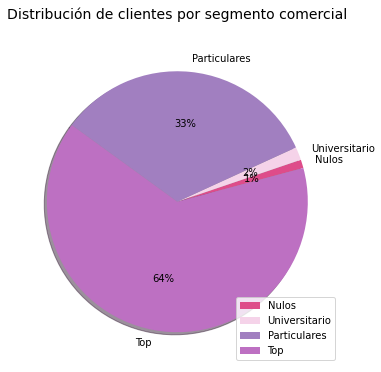

In [ ]:
my_labels = ["Nulos", "Universitario", "Particulares", "Top"]
ax = df[df["pk_partition"] == "2019-05-28"].groupby('segment').size().plot(kind='pie', startangle=15, labels=my_labels,
                                                                           autopct='%1.0f%%', figsize=(6, 6),
                                                                           shadow=True,
                                                                           colors=["#de4c8a", '#f5d3e9', "#A17FC0",
                                                                                   "#BD70C2"])
ax.set_title("Distribución de clientes por segmento comercial", fontsize=14, loc='center', pad=20)
ax.legend(loc='lower right')
plt.ylabel("")
plt.show()

##### **Country_id**
*País de residencia del cliente*

La gran mayoría de clientes están en España.
Los que no están en España, están distribuidos entre diferentes países sin que haya un volumen que genere relavancia.

In [ ]:
#Sumamos los registros por country
df["country_id"].value_counts()

ES    5960672
GB        441
FR        225
DE        199
US        195
CH        194
BR         87
BE         81
VE         79
IE         68
MX         58
AT         51
AR         51
PL         49
IT         45
MA         34
CL         30
CN         28
CA         22
LU         17
ET         17
QA         17
CI         17
SA         17
CM         17
SN         17
MR         17
NO         17
RU         17
CO         17
GA         17
GT         17
DO         17
SE         16
DJ         11
PT         11
JM         11
RO          9
HU          8
DZ          7
PE          4
Name: country_id, dtype: int64

In [ ]:
#Agrupamos con la etiqueta 'otros' los países con menos registros porque podrían ser necesarios para campañas de captación.
df["country_id"] = other_selection(df, "country_id", 1)

In [ ]:
df["country_id"].value_counts()

ES        5960672
Others       2252
Name: country_id, dtype: int64

##### **Region_code**
*Provincia de residencia del cliente (para ES)*

In [ ]:
df["region_code"].value_counts()

28.0    1185757
8.0      600362
46.0     358142
30.0     296856
41.0     290447
15.0     254891
29.0     187911
36.0     175850
3.0      171358
11.0     160894
33.0     134562
50.0     132983
6.0      122587
35.0     121982
47.0     116948
18.0     102789
45.0     102328
37.0      92538
10.0      83283
14.0      75405
2.0       72071
21.0      72037
13.0      70092
39.0      69589
12.0      68709
7.0       62436
32.0      54639
27.0      52783
43.0      51782
17.0      50749
9.0       47746
25.0      46887
16.0      36094
24.0      35426
48.0      35256
26.0      34790
4.0       32680
31.0      31241
49.0      30965
23.0      30955
38.0      29001
34.0      27545
19.0      26762
40.0      21658
5.0       21300
22.0      21112
20.0      18833
1.0       12999
44.0      12616
42.0       8500
51.0       2896
52.0       2638
Name: region_code, dtype: int64

#### Booleanas


*   Active_customer
*   credit_card
*   debit_card
*   em_account_p
*   em_account_pp
*   em_acount 
*   emc_account
*   funds
*   loans
*   long_term_deposit
*   mortgage
*   payroll
*   payroll_account
*   pension_plan
*   securities
*   short_term_deposit 
*   deceased
*   gender

##### Agrupación de tipo de producto

**Productos de ahorro e inversión**: De todos los registros de clientes que tenemos, solamente un 0.06% han adquirido un producto de inversión.

- Pension_plan
- Securities
- Funds
- Long_term_deposit
- Short_term_deposit


**Productos de financiación**: Un 0.1% de nuestros registros de clientes, ha adquirido algún tipo de producto de financiación

- Mortgage
- Loans
- Credit_card
- Debit_card




In [ ]:
#Creamos una nueva columna que agrupe los productos de ahorro e inversión
df["InvestmentProducts"] = df["pension_plan"] + df["securities"] + df["funds"] + df["long_term_deposit"] + df[
    "short_term_deposit"]

In [ ]:
#Contamos cuántos productos hay de cada tipo de producto de ahorro e inversión
df["InvestmentProducts"].value_counts()

0.0    5608840
1.0     333841
2.0      18450
3.0       1581
4.0        151
Name: InvestmentProducts, dtype: int64

In [ ]:
#Queremos que la variable InvestmentProductos, nos indique si un cliente tiene o no uno o varios productos de inversión. Por tanto, reemplazamos los valores 2, 3, 4 y 5 para obtener una variable boolean.
df["InvestmentProducts"].replace([2, 3, 4, 5], 1, inplace=True)

In [ ]:
#Hacemos un value_counts para ver la suma de clientes que tienen y que no tienen productos de inversión.
df["InvestmentProducts"].value_counts(normalize=True)

0.0    0.940629
1.0    0.059371
Name: InvestmentProducts, dtype: float64

In [ ]:
#Creamos una nueva columna que incluya los productos de financiación
df["FinancialProducts"] = df["mortgage"] + df["loans"] + df["credit_card"] + df["debit_card"]

In [ ]:
#Contamos cuántos productos hay de cada tipo de producto de financiación
df["FinancialProducts"].value_counts()

0    5375073
1     541384
2      46159
3        308
Name: FinancialProducts, dtype: int64

In [ ]:
#Queremos que la variable FinancialProducts, nos indique si un cliente tiene o no uno o varios productos de financiación. Por tanto, reemplazamos los valores 2 y 3 para obtener una variable boolean.
df["FinancialProducts"].replace([2, 3], 1, inplace=True)

In [ ]:
#Hacemos un value_counts para ver la suma de clientes que tienen y que no tienen productos de financiación.
df["FinancialProducts"].value_counts(normalize=True)

0    0.901416
1    0.098584
Name: FinancialProducts, dtype: float64

##### **Active_customer:**
*Indicador de actividad del cliente en la compañía.*

Este indicador no es constante con el paso de los meses, sino que puede variar de un mes a otro pasando un cliente de estar activo a inactivo y viceversa.

En el siguiente pie chart, podemos ver la distribución de nuestros clientes en función de si son activos o inactivos en la última extracción de los datos. Vemos que **el 60% de nuestros clientes son inactivos, mientras que los activos representan un 40%**.
Tras este, observamos el listado con los 5 meses con más clientes activos de la base de datos siendo las últimas particiones las que tienen el mayor volumen de activos, por lo que ha habido **una tendencia que ha ido aumentando mensualmente llegando a los 171.568 activos**.

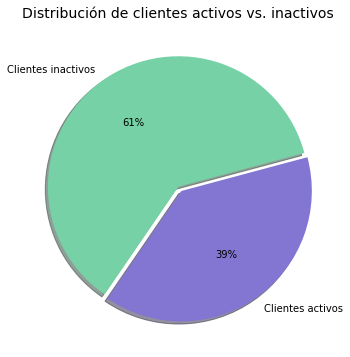

In [ ]:
my_labels = 'Clientes inactivos', 'Clientes activos'
my_explode = (0, 0.04)
ax = df[df["pk_partition"] == "2019-05-28"].groupby('active_customer').size().plot(kind='pie', labels=my_labels,
                                                                                   startangle=15, autopct='%1.0f%%',
                                                                                   figsize=(6, 6), shadow=True,
                                                                                   colors=['#76d2a6', "#8276d2"],
                                                                                   explode=my_explode)
ax.set_title("Distribución de clientes activos vs. inactivos", fontsize=14)
plt.ylabel("")
plt.show()

In [ ]:
#Vemos los 5 meses con más activos y la media entre activos e inactivos por estos meses.
info_mensual(df, 'active_customer').head(5)

active_customer                  
                         sum      mean     len
pk_partition                                  
2019-05-28          171568.0  0.387291  442995
2019-04-28          169998.0  0.386687  439627
2019-03-28          168185.0  0.385584  436183
2019-02-28          165067.0  0.382341  431727
2019-01-28          162545.0  0.380779  426875

In [ ]:
#Llamamos a la función de meses consecutivos para ver cuantos meses seguidos nuestros clientes están activos. 
month_active_df = df.groupby("pk_cid").agg(
    month_active=("active_customer", get_max_consecutive)
)

En el gráfico de distribución mensual, podemos observar que la mayoría de clientes tienen una permanencia de 1 mes con **258.642** y el segundo grupo serían los clientes que llevan todo el tiempo con **91.896**.

Cantidad de clientes que tienen estado activo por 17 meses: 91896


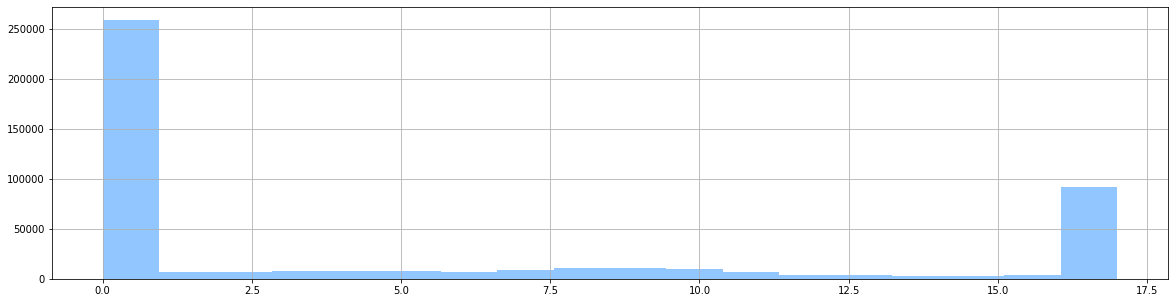

In [ ]:
#Gráfico de barras para ver la distribución según los rangos de meses
print(
    f"Cantidad de clientes que tienen estado activo por 17 meses: {len(month_active_df[month_active_df['month_active'] == 17])}")
month_active_df["month_active"].hist(figsize=(20, 5), bins=18)

In [ ]:
# aquí agrupamos por mes y  año y le damos un valor
df['month_year'] = df['pk_partition'].dt.to_period('M')

Según la evolución mensual, encontramos que a partir de julio de 2018 hay un ascenso notable de **clientes inactivos**.
En cuanto a los activos, mantiene una evolución mensual con una tendencia constante ascendente y finalizando en la última partición con el mayor volumen de **clientes activos**.

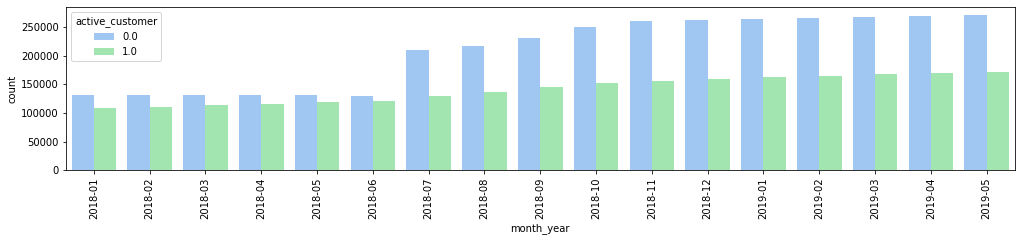

In [ ]:
#Graficamos la evolución mes a mes entre activos e inactivos
plt.figure(figsize=[17, 3])
plt.xticks(rotation=90)
sns.countplot(data=df, x='month_year', hue='active_customer')

In [ ]:
#Media de activos por mes y año
df["active_customer"] = df['active_customer'].astype(int)
partition_df = df[["pk_partition", "active_customer"]].groupby("pk_partition")
partition_df.agg([sum, np.mean, len])

active_customer                  
                         sum      mean     len
pk_partition                                  
2018-01-28            108211  0.451834  239493
2018-02-28            111085  0.458043  242521
2018-03-28            113806  0.464026  245258
2018-04-28            116318  0.470042  247463
2018-05-28            119066  0.476405  249926
2018-06-28            121560  0.482182  252104
2018-07-28            129287  0.380997  339339
2018-08-28            136350  0.386346  352922
2018-09-28            144787  0.385766  375323
2018-10-28            151962  0.377733  402300
2018-11-28            156321  0.375422  416387
2018-12-28            159235  0.376905  422481
2019-01-28            162545  0.380779  426875
2019-02-28            165067  0.382341  431727
2019-03-28            168185  0.385584  436183
2019-04-28            169998  0.386687  439627
2019-05-28            171568  0.387291  442995

##### **Credit_card**
*Tarjetas de crédito*

######Llamada a la función para mostrar la información general mensualmente (suma, media y valores totales). Ver el top 5 meses

Observamos que los **mejores meses son Mayo 2019, Abril 2019, Marzo 2019, Febrero 2019 y diciembre del 2018**.

A nivel de negocio, parece que el inicio de 2019 es cuando hay mayor volumen de tarjetas de crédito. Asciende principalmente el volumen a partir de diciembre de 2018 que aunque en enero desciende ligeramente (lo confirmamos en un gráfico evolutivo posterior), sigue incrementándose el volumen de contrataciones mensualmente terminando las particiones en mayo 2019 con el volumen más alto

In [ ]:
#Vemos los 5 meses con más tarjetas de crédito y la media entre los que tienen y no tienen tarjetas de crédito estos meses. 
#En este caso, la media no es muy significativa ya que se trata de una variable boolean y la mayoría de las observaciones son 0.
credit_card_by_month = info_mensual(df, 'credit_card')
credit_card_by_month[credit_card_by_month.index != "2018-01-28"].head(5)

credit_card                  
                     sum      mean     len
pk_partition                              
2019-05-28          4801  0.010838  442995
2019-04-28          4747  0.010798  439627
2019-03-28          4576  0.010491  436183
2019-02-28          4542  0.010521  431727
2018-12-28          4536  0.010737  422481

######Llamada a la misma variable para ver los peores 5 meses

Observamos que los **peores meses son Febrero 2018, Marzo 2018, Abril 2018, Mayo 2018 y Junio 2018**.

A nivel de negocio, vemos que de forma consecutiva en este periodo van aumentando cada mes el volumen de contrataciones de este producto.

Así que prácticamente en todo el periodo de las particiones, encontramos este incremento lo que es beneficioso para la compañía.

In [ ]:
credit_card_by_month[credit_card_by_month.index != "2018-01-28"].tail(5)

credit_card                  
                     sum      mean     len
pk_partition                              
2018-06-28          4002  0.015874  252104
2018-05-28          3797  0.015192  249926
2018-04-28          3725  0.015053  247463
2018-03-28          3511  0.014316  245258
2018-02-28          3282  0.013533  242521

In [ ]:
del (credit_card_by_month)

##### **Debit_card**
*Tarjetas de débito*

######Llamada a la función para mostrar la información general mensualmente (suma, media y valores totales). Ver el top 5 meses

Observamos que los **mejores meses son Mayo 2019, Abril 2019, Marzo 2019, Febrero 2019 y diciembre del 2018**.

A nivel de negocio, se repiten los meses de mayor volumen de contrataciones en los tipos de tarjetas.

In [ ]:
debit_card_by_month = info_mensual(df, 'debit_card')
debit_card_by_month[debit_card_by_month.index != "2018-01-28"].head(5)

debit_card                  
                    sum      mean     len
pk_partition                             
2019-05-28        43261  0.097656  442995
2019-04-28        42140  0.095854  439627
2019-03-28        41390  0.094891  436183
2019-02-28        39399  0.091259  431727
2018-12-28        37430  0.088596  422481

######Llamada a la misma variable para ver los peores 5 meses

Observamos que los **peores meses son nuevamente Febrero 2018, Marzo 2018, Abril 2018, Mayo 2018 y Junio 2018**.

Vemos que tanto en tarjetas de crédito como en las de débito, la evolución mensual es ascendente siendo el inicio de las particiones, los meses con menos volumen y los últimos de 2019 los que se contratan más tarjetas.

In [ ]:
debit_card_by_month[debit_card_by_month.index != "2018-01-28"].tail(5)

debit_card                  
                    sum      mean     len
pk_partition                             
2018-06-28        28828  0.114350  252104
2018-05-28        27911  0.111677  249926
2018-04-28        27764  0.112195  247463
2018-03-28        27046  0.110276  245258
2018-02-28        25448  0.104931  242521

In [ ]:
del (debit_card_by_month)

##### Visualización del número de tarjetas de crédito vs. tarjetas de débito

Existen 46.116 clientes acumulados, entre todos los meses, que tienen una tarjeta de crédito y de débito.
Existen 5.375.206 clientes acumulados (no únicos) que no tienen ni una tarjeta de crédito ni una tarjeta de débito, corresponde al 90% de los clientes.

In [ ]:
#Contamos el acumulado de clientes que tienen una tarjeta de crédito y de débito 
len(df[(df["debit_card"] == 1) & (df["credit_card"] == 1)])

46116

In [ ]:
#Contamos el acumulado de clientes que no tienen ni una tarjeta de crédito ni una tarjeta de débito, corresponde al 90% de los clientes.
len(df[(df["debit_card"] == 0) & (df["credit_card"] == 0)])

5375206

Observamos que solamente el 11% de los clientes (dato acumulado entre todos los meses) disponen de una tarjeta de crédito. Sin embargo, debemos considerar que un cliente puede tener una tarjeta de crédito y una tarjeta de débito. En este caso, nos encontramos que 46.116 clientes disponen de ambas. Es decir, el 65% de los clientes que tienen una tarjeta de crédito, disponen también de una tarjeta de débito.

En las tarjetas de débito a partir de agosto de 2018 la cantidad es superior a los meses anteriores. En cambio, en tarjetas de crédito la cantidad es más constante entre los meses.

In [ ]:
#Seleccionamos la última partición del dataset que contienen los valores "True" para visualizarlos posteriormente
credit_card_1 = df[df["credit_card"] == 1 & (df["pk_partition"] == "2019-05-28")]

In [ ]:
#Seleccionamos la última partición del dataset que contienen los valores "True" para visualizarlos posteriormente
debit_card_1 = df[(df["debit_card"] == 1) & (df["pk_partition"] == "2019-05-28")]

In [ ]:
credit_card_1

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment,country_id,region_code,gender,age,...,entry_date_Weekday,entry_date_Trim,pk_partition_Month,pk_partition_Year,pk_partition_Week,pk_partition_Weekday,pk_partition_Trim,InvestmentProducts,FinancialProducts,month_year
0,1375586,2018-01-28,2018-01-12,KHL,1,02 - PARTICULARES,ES,29.0,H,35,...,4,1,1,2018,4,6,1,0.0,0,2018-01
1,1050611,2018-01-28,2015-08-10,KHE,0,03 - UNIVERSITARIO,ES,13.0,V,23,...,0,3,1,2018,4,6,1,0.0,0,2018-01
2,1050612,2018-01-28,2015-08-10,KHE,0,03 - UNIVERSITARIO,ES,13.0,V,23,...,0,3,1,2018,4,6,1,0.0,0,2018-01
3,1050613,2018-01-28,2015-08-10,KHD,0,03 - UNIVERSITARIO,ES,50.0,H,22,...,0,3,1,2018,4,6,1,1.0,0,2018-01
4,1050614,2018-01-28,2015-08-10,KHE,1,03 - UNIVERSITARIO,ES,50.0,V,23,...,0,3,1,2018,4,6,1,0.0,0,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962503,1167021,2019-05-28,2016-12-27,KAT,1,03 - UNIVERSITARIO,ES,8.0,V,31,...,1,4,5,2019,22,1,2,0.0,1,2019-05
5962640,1167114,2019-05-28,2016-08-16,KAT,1,02 - PARTICULARES,ES,3.0,V,40,...,1,3,5,2019,22,1,2,1.0,1,2019-05
5962648,1167055,2019-05-28,2017-11-12,KFC,1,02 - PARTICULARES,ES,33.0,V,39,...,6,4,5,2019,22,1,2,0.0,1,2019-05
5962687,1167088,2019-05-28,2016-08-16,KAT,1,03 - UNIVERSITARIO,ES,28.0,V,31,...,1,3,5,2019,22,1,2,1.0,1,2019-05


In [ ]:
del (credit_card_1)
del (debit_card_1)
del (type_card)

###### Groupby para ver la cantidad de tarjetas de crédito y débito a nivel mensual

Hay que tomar en cuenta que la primera partición acumula datos anteriores (no son únicamente de enero 2018) por ello, para las conclusiones no se tienen en cuenta.
Destaca febrero de 2018 siendo el mes con cliente con menos tarjetas de crédito.
No existen irregularidades en los meses posteriores sino una evolución constante que se mantiene de forma ascendente en los dos tipos de producto. **En el último mes, encontramos 4.801 tarjetas de débito y 43.261 de crédito**.

In [ ]:
#Groupby para mostrar la suma y la media por cada 'ventana' del año, con la cantidad de tarjetas de crédito y débito.
df.groupby(["pk_partition_Year", "pk_partition_Month"]).agg(
    credit_card_sum=("credit_card", "sum"),
    credit_card_mean=("credit_card", np.mean),
    debit_card_sum=("debit_card", "sum"),
    debit_card_mean=("debit_card", np.mean)
)

credit_card_sum  credit_card_mean  \
pk_partition_Year pk_partition_Month                                      
2018              1                              3325          0.013883   
                  2                              3282          0.013533   
                  3                              3511          0.014316   
                  4                              3725          0.015053   
                  5                              3797          0.015192   
                  6                              4002          0.015874   
                  7                              4137          0.012191   
                  8                              4206          0.011918   
                  9                              4289          0.011427   
                  10                             4385          0.010900   
                  11                             4512          0.010836   
                  12                             4536          0.010737   
2019              1                              4493          0.010525   
                  2                              4542          0.010521   
                  3                              4576          0.010491   
                  4                              4747          0.010798   
                  5                              4801          0.010838   

                                      debit_card_sum  debit_card_mean  
pk_partition_Year pk_partition_Month                                   
2018              1                            24696         0.103118  
                  2                            25448         0.104931  
                  3                            27046         0.110276  
                  4                            27764         0.112195  
                  5                            27911         0.111677  
                  6                            28828         0.114350  
                  7                            29578         0.087164  
                  8                            29205         0.082752  
                  9                            31684         0.084418  
                  10                           34372         0.085439  
                  11                           35466         0.085176  
                  12                           37430         0.088596  
2019              1                            37350         0.087496  
                  2                            39399         0.091259  
                  3                            41390         0.094891  
                  4                            42140         0.095854  
                  5                            43261         0.097656

##### **Em_account_p**
*Cuenta easyMoney+*

######Llamada a la función para mostrar la información general mensualmente (suma, media y valores totales). Ver el top 5 meses

Vemos que hay muy pocas contrataciones de este producto.
Observamos que el único mes con contrataciones es Enero 2018 pero porque acumula los datos de meses anteriores.


In [ ]:
info_mensual(df, 'em_account_p').head(5)

em_account_p                  
                      sum      mean     len
pk_partition                               
2018-01-28              2  0.000008  239493
2018-10-28              2  0.000005  402300
2019-04-28              2  0.000005  439627
2019-03-28              2  0.000005  436183
2019-02-28              2  0.000005  431727

##### **Em_account_pp**
*Cuenta easyMoney++*

######Llamada a la función para mostrar la información general mensualmente (suma, media y valores totales). Ver el top 5 meses

Vemos que no hay contrataciones de este producto

In [ ]:
info_mensual(df, 'em_account_pp').head(5)

em_account_pp             
                       sum mean     len
pk_partition                           
2018-01-28               0  0.0  239493
2018-10-28               0  0.0  402300
2019-04-28               0  0.0  439627
2019-03-28               0  0.0  436183
2019-02-28               0  0.0  431727

##### **Em_acount**
*Cuenta easyMoney*

######Llamada a la función para mostrar la información general mensualmente (suma, media y valores totales). Ver el top 5 meses

Vemos que de las cuentas, es el tipo de cuenta que más tienen contratado.
Observamos que **los mejores meses son a partir de Enero de 2019 aumentando mes a mes hasta los 296.380 contrataciones de este tipo de cuenta**.

Parece haber la misma tendencia que en los productos de tarjetas, que a partir de 2019 son los meses con mayor volumen de adquisición de productos.

Destacamos los mayores aumentos de contrataciones de este tipo de cuenta de Julio de 2018 a Octubre 2018 y que a partir de entonces la evolución es más progresiva aunque mantiene la tendencia positiva de incremento.

In [ ]:
em_acount_by_month = info_mensual(df, 'em_acount')
em_acount_by_month[em_acount_by_month.index != "2018-01-28"].head(5)

em_acount                  
                   sum      mean     len
pk_partition                            
2019-05-28      296380  0.669037  442995
2019-04-28      295844  0.672943  439627
2019-03-28      295046  0.676427  436183
2019-02-28      292988  0.678642  431727
2019-01-28      291786  0.683540  426875

In [ ]:
del (em_acount_by_month)

##### **Emc_account**
*Cuenta easyMoney Crypto*

######Llamada a la función para mostrar la información general mensualmente (suma, media y valores totales). Ver el top 5 meses

Vemos que de las cuentas, es el 3º tipo de cuenta que más tienen contratado.
Observamos que los mejores meses son Mayo 2019, Abril 2019, Marzo 2019, Febrero 2019 y Enero 2019. 
Entendemos que en 2019 hay más contrataciones de los productos más populares que dispone la compañía.

In [ ]:
emc_account_by_month = info_mensual(df, 'emc_account')
emc_account_by_month[emc_account_by_month.index != "2018-01-28"].head(5)

emc_account                  
                     sum      mean     len
pk_partition                              
2019-05-28         24751  0.055872  442995
2019-04-28         23455  0.053352  439627
2019-03-28         22480  0.051538  436183
2019-02-28         21796  0.050486  431727
2019-01-28         20921  0.049010  426875

In [ ]:
del (emc_account_by_month)

##### **Payroll_account**
*Cuenta bonificada por domiciliaciones*

######Llamada a la función para mostrar la información general mensualmente (suma, media y valores totales). Ver el top 5 meses

Vemos que de las cuentas, es el 2º tipo de cuenta que más tienen contratado
Observamos que los mejores meses son los mismos que en las anteriores cuentas.

Parecen estar relacionados con los dos campañas especiales: 2 meses previos a navidad y dos meses de verano (julio y agosto). Posteriormente, parece que en 2019 pudiera inicializarse la siguiente campaña especial.

In [ ]:
payroll_account_by_month = info_mensual(df, 'payroll_account')
payroll_account_by_month[payroll_account_by_month.index != "2018-01-28"].head(5)

payroll_account                  
                         sum      mean     len
pk_partition                                  
2019-05-28             26529  0.059886  442995
2019-04-28             25501  0.058006  439627
2019-03-28             24390  0.055917  436183
2019-02-28             23264  0.053886  431727
2019-01-28             22324  0.052296  426875

In [ ]:
del (payroll_account_by_month)

##### Creación nueva columna que indique si el registro tiene una cuenta 

Existe un 19.6% de los registros que no tiene una cuenta.

In [ ]:
#Creamos una nueva columna, sumando el resultado de todas las columnas del clientes
df["HasAccount"] = df["em_account_p"] + df["em_account_pp"] + df["em_acount"] + df["emc_account"] + df[
    "payroll_account"]

In [ ]:
#Observamos que existen personas que tenga 0,1,2 o hasta 3 cuentas diferentes.
df["HasAccount"].value_counts(normalize=True)

1    0.762255
0    0.196789
2    0.040233
3    0.000723
Name: HasAccount, dtype: float64

In [ ]:
#Queremos que la variable HasAccount, nos indique si un cliente tiene o no uno o varias cuentas. Por tanto, reemplazamos los valores 2 y 3 para obtener una variable boolean.
df["HasAccount"].replace([2, 3], 1, inplace=True)

In [ ]:
#Hacemos un value_counts para ver la suma de clientes que tienen y que no tienen cuentas.
df["HasAccount"].value_counts(normalize=True)

1    0.803211
0    0.196789
Name: HasAccount, dtype: float64

##### Creación nueva columna que indique si el registro ha realizado alguna compra (producto de financiación, producto de inversión o cuenta bancária).

El 81% de los clientes ha comprado alguno de los productos.

In [ ]:
df["HasBought"] = df["HasAccount"] + df["InvestmentProducts"] + df["FinancialProducts"]

In [ ]:
#Un registro puede tener hasta un máximo de 3 ventas que significaría que ha comprado un producto de inversión, un producto de financiación y además tiene una cuenta bancária (como mínimo).
df["HasBought"].value_counts(normalize=False)

1.0    4108123
0.0    1121449
2.0     576637
3.0     156654
Name: HasBought, dtype: int64

In [ ]:
df["HasBought"].replace([2, 3], 1, inplace=True)

In [ ]:
#Hacemos un value_counts para ver la suma de clientes que tienen y que no tienen cualquier tipo de producto.
df["HasBought"].value_counts(normalize=True)

1.0    0.811928
0.0    0.188072
Name: HasBought, dtype: float64

##### Visualización de los tipos de cuenta

Observamos que según los datos acumulados en el total del período, el tipo de cuentas más contratado es el em_account. 

In [ ]:
#Seleccionamos el dataset que contienen los valores "True" para visualizarlos posteriormente
em_account_p_1 = df[df["em_account_p"] == 1]
em_account_pp_1 = df[df["em_account_pp"] == 1]
em_acount_1 = df[df["em_acount"] == 1]
emc_account_1 = df[df["emc_account"] == 1]
payroll_account_1 = df[df["payroll_account"] == 1]

In [ ]:
cuentas_df = [['Cuenta em_account_p', len(em_account_p_1)], ['Cuenta em_acount', len(em_acount_1)],
              ['Cuenta emc_account', len(emc_account_1)], ["Cuenta Payroll", len(payroll_account_1)]]
cuentas_df = pd.DataFrame(cuentas_df, columns=['Tipos de cuenta', 'Column count']).sort_values('Column count',
                                                                                               ascending=True)

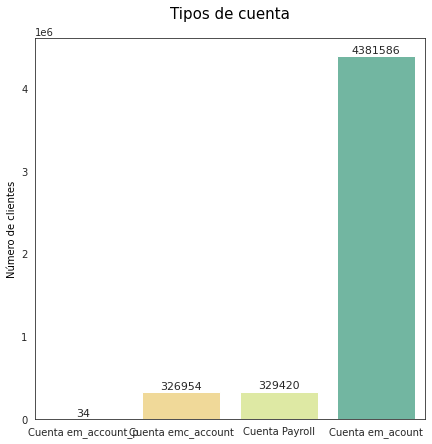

In [ ]:
#Gráfico de barras para indicar el volumen total por cada tipo de cuenta.
f, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x="Tipos de cuenta", y="Column count", data=cuentas_df, label="Missing", palette='Spectral')
ax.set_ylabel('Número de clientes', fontsize=10, color='k')
ax.set_xlabel('')
ax.set_title('Tipos de cuenta', fontsize=15, color='k', pad=20)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom',
                fontsize=11)
plt.show()

In [ ]:
del (em_account_p_1)
del (em_account_pp_1)
del (em_acount_1)
del (emc_account_1)
del (payroll_account_1)
del (cuentas_df)

##### **Long_term_deposit**
*Depósitos a largo plazo*

######Llamada a la función para mostrar la información general mensualmente (suma, media y valores totales). Ver el top 5 meses

En los depósitos a largo plazo, vemos que los mejores meses son **Diciembre 2018, Enero 2019, Febrero 2019, Marzo 2019 y Noviembre 2018**, por lo que sería el periodo de invierno el más beneficioso en cuanto a contrataciones de este tipo de producto.

In [ ]:
long_term_deposit_by_month = info_mensual(df, 'long_term_deposit')
long_term_deposit_by_month[long_term_deposit_by_month.index != "2018-01-28"].head(5)

long_term_deposit                  
                           sum      mean     len
pk_partition                                    
2018-12-28                6749  0.015975  422481
2019-01-28                6659  0.015599  426875
2019-02-28                6658  0.015422  431727
2019-03-28                6537  0.014987  436183
2018-11-28                6447  0.015483  416387

In [ ]:
del (long_term_deposit_by_month)

##### **Short_term_deposit**
*Short-term deposits*

######Llamada a la función para mostrar la información general mensualmente (suma, media y valores totales). Ver el top 5 meses

En los depósitos a corto plazo, vemos que los mejores meses son **Octubre 2018, Septiembre 2018, Mayo 2018, Marzo 2018 y Abril 2018**.

Septiembre, Julio y Junio son los meses que están en el top 5 mejores meses tanto de depósitos a largo plazo como a corto plazo.

In [ ]:
short_term_deposit_by_month = info_mensual(df, 'short_term_deposit')
short_term_deposit_by_month[short_term_deposit_by_month.index != "2018-01-28"].head(5)

short_term_deposit                  
                            sum      mean     len
pk_partition                                     
2018-04-28                 1740  0.007031  247463
2018-03-28                 1664  0.006785  245258
2018-05-28                 1455  0.005822  249926
2018-09-28                 1386  0.003693  375323
2018-10-28                 1374  0.003415  402300

In [ ]:
del (short_term_deposit_by_month)

##### Visualización del número de long_term_deposit versus el número de short_term_deposit

Existe mayor volumen de contrataciones según los datos acumulados, de long-term deposit (100.660) vs short-term deposit (15.394). 

In [ ]:
#Seleccionamos el dataset que contienen los valores "True" para visualizarlos posteriormente
long_term_deposit_1 = df[df["long_term_deposit"] == 1]
short_term_deposit_1 = df[df["short_term_deposit"] == 1]

In [ ]:
deposit_df = [['Long-term deposit', len(long_term_deposit_1)], ['Short-term deposit', len(short_term_deposit_1)]]
deposit_df = pd.DataFrame(deposit_df, columns=['Tipo de depósito', 'Column count']).sort_values('Column count',
                                                                                                ascending=True)

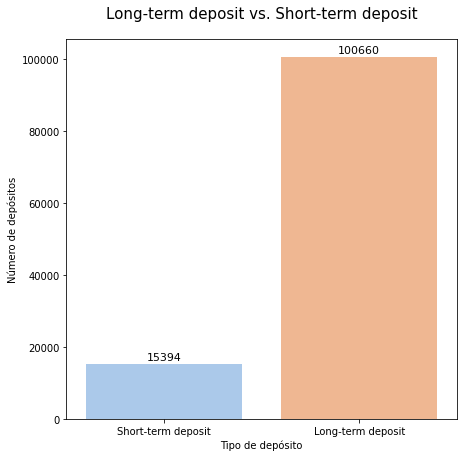

In [ ]:
#Gráfico de barras para mostrar la suma acumulada de contrataciones de los tipos de depósito
f, ax = plt.subplots(figsize=(7, 7))
sns.barplot(x="Tipo de depósito", y="Column count", data=deposit_df, label="Missing", palette='pastel')
ax.set_ylabel('Número de depósitos', fontsize=10, color='k')
ax.set_title('Long-term deposit vs. Short-term deposit', fontsize=15, color='k', pad=20)

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom',
                fontsize=11)
plt.show

plt.show()

In [ ]:
del (long_term_deposit_1)
del (short_term_deposit_1)
del (deposit_df)

##### **Payroll**
*Domiciliaciones*

###### Tratamiento de nulos de la variable "Payroll"

Observamos que como hay pocos nulos, los decidimos eliminar

In [ ]:
#Contamos cuántos nulos hay.
df["payroll"].isnull().sum()

61

In [ ]:
df.dropna(subset=['payroll'], inplace=True)

In [ ]:
df["payroll"].isnull().sum()

0

######Llamada a la función para mostrar la información general mensualmente (suma, media y valores totales). Ver el top 5 meses

Observamos que los meses donde hay más cantidad de domiciliaciones es  en **Mayo 2019, Abril 2019, Marzo 2019, Diciembre 2018 y Febrero 2019**.

In [ ]:
payroll_by_month = info_mensual(df, 'payroll')
payroll_by_month[payroll_by_month.index != "2018-01-28"].head(5)

payroll                  
                  sum      mean     len
pk_partition                           
2019-05-28    16333.0  0.036870  442993
2019-04-28    15231.0  0.034645  439625
2019-03-28    15114.0  0.034651  436181
2018-12-28    14452.0  0.034208  422479
2019-02-28    14378.0  0.033304  431725

##### **Funds**
*Fondos de inversión*

######Llamada a la función para mostrar la información general mensualmente (suma, media y valores totales). Ver el top 5 meses

Observamos que los meses donde hay más cantidad de fondos de inversión contratados son **Enero 2019, Marzo 2019, Diciembre 2018, Abril 2019 y Febrero 2019**. Aunque en un orden diferente, se mantienen los meses con más volumen de contrataciones al igual que casi el resto de productos.

In [ ]:
funds_by_month = info_mensual(df, 'funds')
funds_by_month[funds_by_month.index != "2018-01-28"].head(5)

funds                  
               sum      mean     len
pk_partition                        
2019-01-28    1330  0.003116  426873
2019-03-28    1322  0.003031  436181
2018-12-28    1322  0.003129  422479
2019-04-28    1320  0.003003  439625
2019-02-28    1316  0.003048  431725

##### **Securities**
*Seguros*

######Llamada a la función para mostrar la información general mensualmente (suma, media y valores totales). Ver el top 5 meses

Observamos que los meses donde hay más cantidad de seguros contratados son igual que en la mayoría de productos revisados: **Mayo 2019, Abril 2019, Marzo 2019, Febrero 2019 y Enero**.

In [ ]:
securities_by_month = info_mensual(df, 'securities')
securities_by_month[securities_by_month.index != "2018-01-28"].head(5)

securities                  
                    sum      mean     len
pk_partition                             
2019-05-28         1789  0.004038  442993
2019-04-28         1782  0.004053  439625
2019-03-28         1769  0.004056  436181
2019-02-28         1747  0.004047  431725
2019-01-28         1655  0.003877  426873

##### **Pension_plan**
*Plan de pensiones*

######Llamada a la función para mostrar la información general mensualmente (suma, media y valores totales). Ver el top 5 meses

Observamos que los meses donde hay más cantidad de planes de pensiones contratados son igual que en la mayoría de productos revisados: **Mayo 2019, Abril 2019, Marzo 2019, Diciembre 2018 y Febrero 2019**, solo con la diferencia de que febrero 2019 tendría una cantidad menor de contrataciones que diciembre de 2018.

In [ ]:
pension_plan_by_month = info_mensual(df, 'pension_plan')
pension_plan_by_month[pension_plan_by_month.index != "2018-01-28"].head(5)

pension_plan                  
                      sum      mean     len
pk_partition                               
2019-05-28        17353.0  0.039172  442995
2019-04-28        16220.0  0.036895  439627
2019-03-28        15976.0  0.036627  436183
2018-12-28        15324.0  0.036271  422481
2019-02-28        15265.0  0.035358  431727

In [ ]:
del (pension_plan_by_month)

##### **Gender**
*Género del cliente*

La distribución del género de nuestra base de clientes es prácticamente equitativa con un **52% de hombres y un 48% de mujeres**.

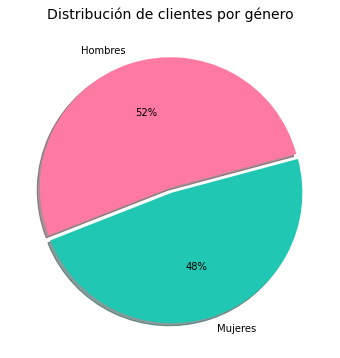

In [ ]:
#Gráfico circular para ver la distribución entre Mujeres y Hombres
my_labels = ["Hombres", "Mujeres"]
my_explode = (0, 0.04)
ax = df.groupby('gender').size().plot(kind='pie', startangle=15, labels=my_labels, autopct='%1.0f%%', figsize=(6, 6),
                                      shadow=True, colors=['#FF7AA2', "#20c8b3"], explode=my_explode)
ax.set_title("Distribución de clientes por género", fontsize=14)
plt.ylabel("")
plt.show()

In [ ]:
#Eliminamos los nulos del dataset
df.dropna(subset=['gender'], inplace=True)

In [ ]:
#Verificamos que no hay nulos
df["gender"].isnull().sum()

0

##### **Deceased**
*Decreased index. N/S*

Vemos que por la cantidad de fallecidos que hay, no cal eliminarlos porque no es una cantidad relevante

In [ ]:
#contamos cuántos fallecidos hay
df["deceased"].value_counts()

N    5961763
S       1075
Name: deceased, dtype: int64

#### Numéricas

*   Age
*   Salary




##### **Age**
*Edad del cliente*

Vemos que hay el mayor volumen de clientes tiene 20 años, mientras que el que menos son de **8 años**. Esto nos lleva a la conclusión de que la mayor parte de los clientes de EasyMoney son gente joven.
Observamos que el mayor porcentaje de los clientes están comprendidos en la franja de edad entre **20-25 años**

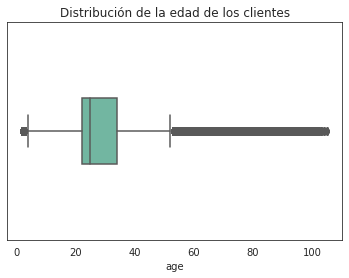

In [ ]:
sns.set_style("white")
sns.boxplot(x='age', data=df, width=0.3, palette="Set2", linewidth=1.5, ).set(
    title='Distribución de la edad de los clientes')
plt.show()

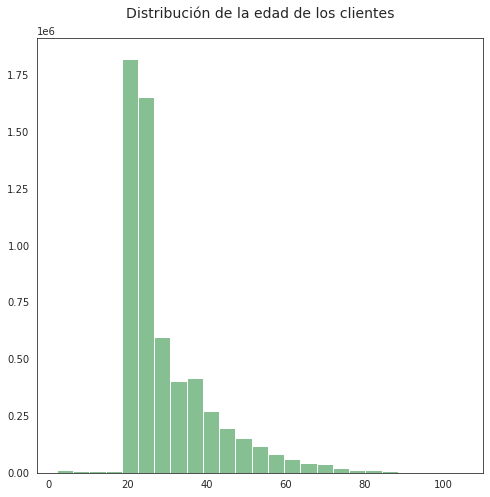

In [ ]:
ax = df.hist(column='age', bins=25, grid=False, figsize=(8, 8), color='#86bf91', zorder=2, rwidth=1.5)
plt.title('Distribución de la edad de los clientes', fontsize=14, pad=20)
plt.show()

In [ ]:
gc.collect()  # Limpia memoria

11181

##### Salary
presentacion de los salarios de los clientes, proveniente de haber aplicado un KNNImputer en funcion de la edad y los salarios mas proximos

In [ ]:
%%time
salary_df = pd.read_csv(f"{__INTERIM_DATA_PATH__}/salary_df.csv", index_col=0)
print(salary_df.shape)
salary_df.head(20)

FileNotFoundError: ignored

In [ ]:
def describe_graph(dataframe: pd.DataFrame, column: str):
    dataframe_describe = dataframe[[column]].describe()
    dataframe_describe.reset_index(inplace=True)
    dataframe_describe = dataframe_describe[dataframe_describe["index"] != "count"]

    sns.catplot(x="index", y=column, data=dataframe_describe, kind="point")
    plt.show()

    return dataframe_describe

In [ ]:
describe_graph(salary_df, "knn_salary").T

In [ ]:
print("Grafico sin el quantile 99 (sin los Outliers)")
salary_to_describe = salary_df[salary_df["knn_salary"] <= np.quantile(salary_df["knn_salary"], q=0.99)]
describe_graph(salary_to_describe, "knn_salary").T

In [ ]:
df["salary"].fillna(-1, inplace=True)

### Visualizaciones y análisis multivariante

Para determinar cuáles son las visualizaciones más relevantes a nivel de negocio, hemos seleccionado aquellas variables que creemos que nos permitirán posteriormente realizar la segmentación de nuestros clientes. Por tanto, a través de las visualizaciones y el análisis multivariante podremos ver si existen relaciones que debamos de tener en cuenta para realizar decisiones de negocio.

#### Visualizaciones según la edad de los clientes 

##### Visualización de las edades de los cientes que han comprado targetas de crédito versus targetas de débito 

Según las edades, los clientes entre 20 y 59 años adquieren más tarjetas de débito vs crédito.
A partir de los 60 años, la cifra es más similar y a los 80 ya no tienen este tipo de productos.

In [ ]:
customers_age = pd.pivot_table(df, index=["age"], values=["credit_card", "debit_card"], aggfunc=[np.mean, len, sum])

In [ ]:
customers_age

mean                    len                    sum           
    credit_card debit_card credit_card debit_card credit_card debit_card
age                                                                     
2           0.0   0.000000         688        688           0          0
3           0.0   0.000000        1534       1534           0          0
4           0.0   0.000000        2210       2210           0          0
5           0.0   0.000000        2920       2920           0          0
6           0.0   0.000000        3043       3043           0          0
..          ...        ...         ...        ...         ...        ...
101         0.0   0.054945          91         91           0          5
102         0.0   0.000000          65         65           0          0
103         0.0   0.000000          25         25           0          0
104         0.0   0.000000          12         12           0          0
105         0.0   0.000000           8          8           0          0

[104 rows x 6 columns]

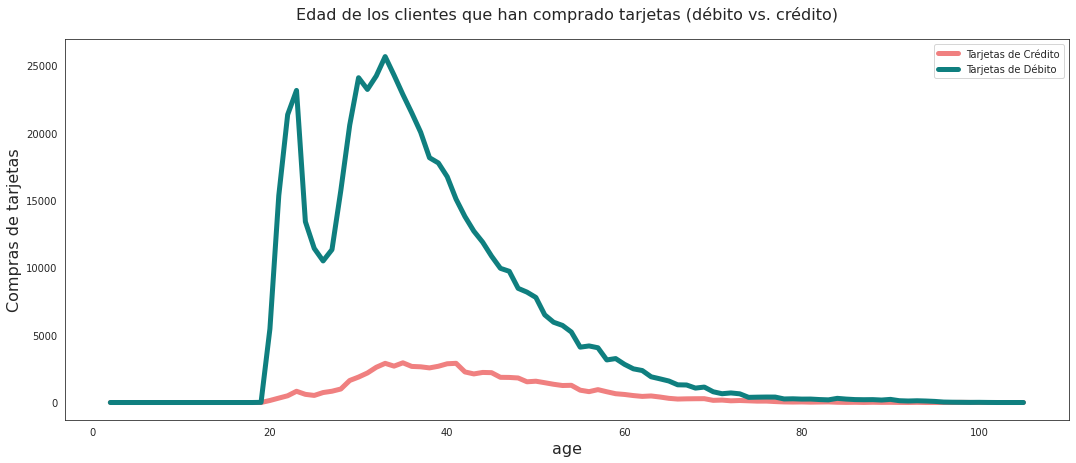

In [ ]:
plt.figure(figsize=[18, 7])
plt.title("Edad de los clientes que han comprado tarjetas (débito vs. crédito)", fontsize=16, pad=20)
plt.xlabel("Edad de los clientes", fontsize=16)
plt.ylabel("Compras de tarjetas", fontsize=16)
customers_age[("sum", "credit_card")].plot(kind="line", label="Tarjetas de Crédito", linewidth=5, color='lightcoral')
customers_age[("sum", "debit_card")].plot(kind="line", label="Tarjetas de Débito", linewidth=5, color="#0f7f7f")
plt.legend()
plt.show()

##### Distribución de las edades según el sueldo

Encontramos la mayor cantidad puntos acumulados en los clientes que tienen entre 20 y 40 años principalmente, y aunque hay algunos que destacan con altas cantidades de salario, la mayoría se concentran en un salario más bajo.

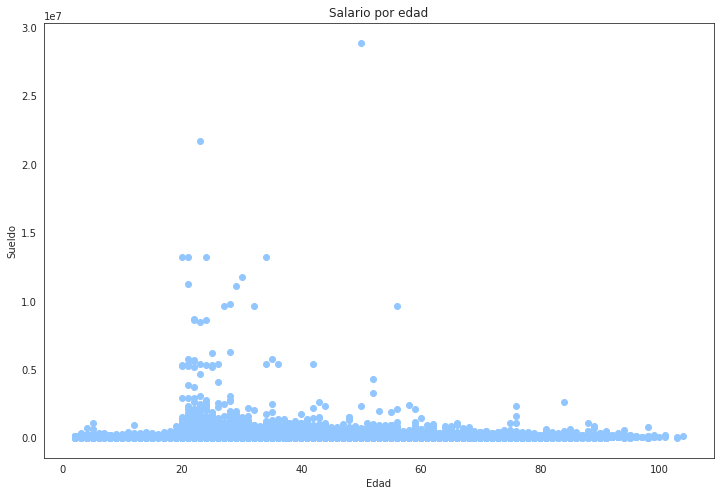

In [ ]:
plt.figure(figsize=[12, 8])
plt.xlabel("Edad")
plt.ylabel("Sueldo")
plt.scatter(x=df["age"].sample(200000), y=df["salary"].sample(200000))
plt.title("Salario por edad")
plt.show()

##### Distribución de las edades según el género 

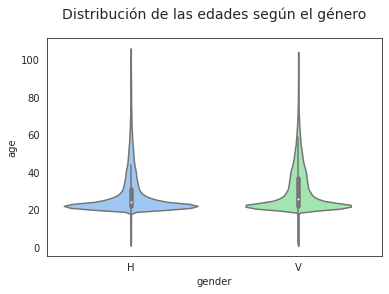

In [ ]:
ax = sns.violinplot(data=df, x='gender', y='age', figsize=(6, 6))
ax.set_title("Distribución de las edades según el género", fontsize=14, pad=20)
plt.show()

##### Visualización de las edades de los cientes que tienen un plan de pensión. 

Encontramos que los clientes entre 20 y 40 años son el rango que mayor contratación de plan de pensiones tienen. El grupo prioritario serían los registros sobre los 30 años.

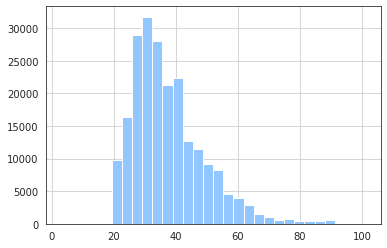

In [ ]:
df.loc[df["pension_plan"] == 1, "age"].hist(bins=30)

##### Visualización de las edades de los cientes que tienen hipotecas. 

Encontramos diversos grupos destacables que tienen contratada la hipoteca. El primero sería el comprendido por clientes de 36 años, seguido de los que tienen 35, 37, 41 y 54 años.

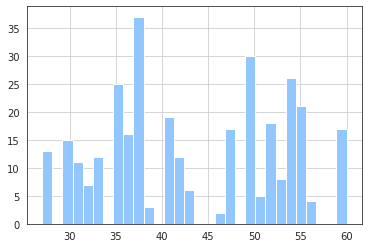

In [ ]:
df.loc[df["mortgage"] == 1, "age"].hist(bins=30)

##### Visualización de las edades de los cientes que tienen productos de inversión. 

Entre los 20 y los 45 años, son los clientes que más productos de inversión tienen, destacando principalmente los que tienen entre 28 y 40 con más contrataciones.

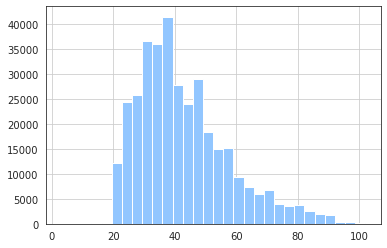

In [ ]:
df.loc[df["InvestmentProducts"] == 1, "age"].hist(bins=30)

#### Visualización de las ventas 

##### Ventas de productos de financiación

En todo el rango, encontramos que los productos más contratados son las tarjetas de débito.
Observamos que se incrementan las contrataciones de productos mensualmente, por lo que hay una evolución positiva que muestra el crecimiento. 
Los productos menos contratados son las hipotecas, los préstamos y las tarjetas de crédito.



In [ ]:
Ventas_FinancialProducts = pd.pivot_table(data=df, index=["pk_partition_Year", "pk_partition_Month"],
                                          values=["credit_card", "debit_card", "mortgage", "loans",
                                                  "FinancialProducts"], aggfunc=[sum, len, np.median])

In [ ]:
Ventas_FinancialProducts

sum                         \
                                     FinancialProducts credit_card debit_card   
pk_partition_Year pk_partition_Month                                            
2018              1                              25887        3325      24696   
                  2                              26636        3282      25448   
                  3                              28284        3511      27046   
                  4                              29066        3725      27762   
                  5                              29300        3797      27910   
                  6                              30262        4002      28827   
                  7                              31036        4137      29577   
                  8                              30742        4206      29204   
                  9                              33140        4289      31683   
                  10                             35907        4385      34371   
                  11                             37083        4512      35465   
                  12                             39025        4536      37429   
2019              1                              38926        4493      37349   
                  2                              40982        4542      39398   
                  3                              42933        4576      41389   
                  4                              43759        4747      42139   
                  5                              44868        4801      43260   

                                                                  len  \
                                     loans mortgage FinancialProducts   
pk_partition_Year pk_partition_Month                                    
2018              1                     19       15            239476   
                  2                     19       15            242507   
                  3                     23       17            245247   
                  4                     24       17            247452   
                  5                     27       18            249915   
                  6                     27       19            252103   
                  7                     28       20            339338   
                  8                     29       20            352920   
                  9                     31       20            375321   
                  10                    33       19            402298   
                  11                    32       19            416385   
                  12                    30       19            422479   
2019              1                     28       20            426873   
                  2                     29       20            431725   
                  3                     29       20            436181   
                  4                     30       23            439625   
                  5                     30       23            442993   

                                                                              \
                                     credit_card debit_card   loans mortgage   
pk_partition_Year pk_partition_Month                                           
2018              1                       239476     239476  239476   239476   
                  2                       242507     242507  242507   242507   
                  3                       245247     245247  245247   245247   
                  4                       247452     247452  247452   247452   
                  5                       249915     249915  249915   249915   
                  6                       252103     252103  252103   252103   
                  7                       339338     339338  339338   339338   
                  8                       352920     352920  352920   352920   
                  9                       375321     375321  375321   375321   
         

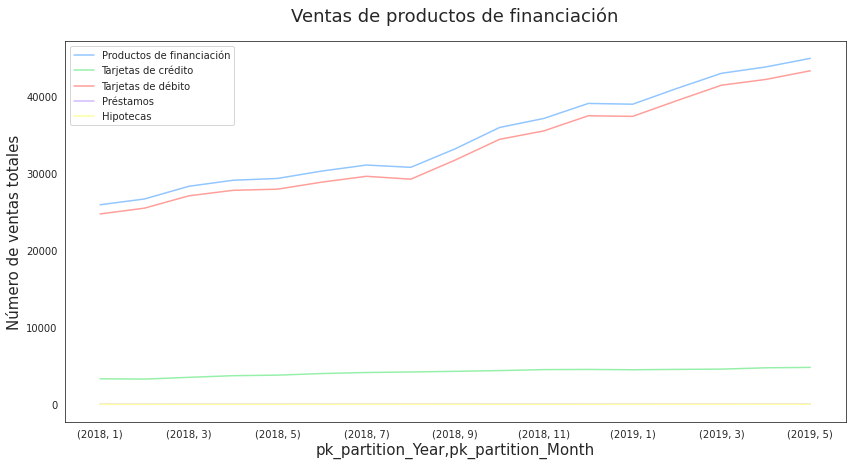

In [ ]:
plt.figure(figsize=[14, 7])
plt.title("Ventas de productos de financiación", fontsize=18, pad=20)
plt.xlabel("Fecha de la venta", fontsize=15)
plt.ylabel("Número de ventas totales", fontsize=15)
Ventas_FinancialProducts[("sum", "FinancialProducts")].plot(kind="line", label="Productos de financiación")
Ventas_FinancialProducts[("sum", "credit_card")].plot(kind="line", label="Tarjetas de crédito")
Ventas_FinancialProducts[("sum", "debit_card")].plot(kind="line", label="Tarjetas de débito")
Ventas_FinancialProducts[("sum", "loans")].plot(kind="line", label="Préstamos")
Ventas_FinancialProducts[("sum", "mortgage")].plot(kind="line", label="Hipotecas")
plt.legend()
plt.show()

##### Ventas de productos de inversión

Los planes de pensiones son el producto entre los productos de inversión, que más contratan los clientes y que los fondos de inversión son los que menos.
Sobretodo en el mes de Febrero, ha sido el mes con más contrataciones de este producto.  
Igualmente, parece que a partir de 2019, es cuando menos se contratan el resto de productos ya que todos descienden.
Aunque los depósitos a corto plazo se mantenian a un ritmo constante de contrataciones, a partir de noviembre 2018 desciende y no vuelve a recuperarse.
Los depósitos a largo plazo aumentaron en contrataciones a partir de mitad del 2018 pero a finales de año vuelve a descender.
Los valores y los fondos de inversión son los productos que menos se contratan.

In [ ]:
Ventas_InvestmentProducts = pd.pivot_table(data=df, index=["pk_partition_Year", "pk_partition_Month"],
                                           values=["funds", "long_term_deposit", "short_term_deposit", "securities",
                                                   "InvestmentProducts", "pension_plan"], aggfunc=[sum, len, np.median])

In [ ]:
Ventas_InvestmentProducts.drop((2018, 1), inplace=True)

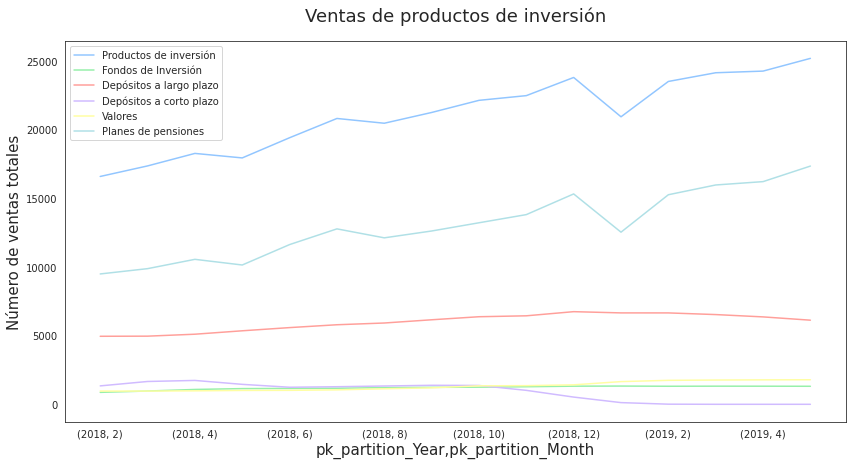

In [ ]:
plt.figure(figsize=[14, 7])
plt.title("Ventas de productos de inversión", fontsize=18, pad=20)
plt.xlabel("Fecha de la venta", fontsize=15)
plt.ylabel("Número de ventas totales", fontsize=15)
Ventas_InvestmentProducts[("sum", "InvestmentProducts")].plot(kind="line", label="Productos de inversión")
Ventas_InvestmentProducts[("sum", "funds")].plot(kind="line", label="Fondos de Inversión")
Ventas_InvestmentProducts[("sum", "long_term_deposit")].plot(kind="line", label="Depósitos a largo plazo")
Ventas_InvestmentProducts[("sum", "short_term_deposit")].plot(kind="line", label="Depósitos a corto plazo")
Ventas_InvestmentProducts[("sum", "securities")].plot(kind="line", label="Valores")
Ventas_InvestmentProducts[("sum", "pension_plan")].plot(kind="line", label="Planes de pensiones")
plt.legend()
plt.show()

##### Productos de inversión versus productos de financiación en función del entry_date_month

In [ ]:
tabla = pd.pivot_table(df,index ='entry_date_Month', values=['HasAccount','InvestmentProducts','FinancialProducts'],aggfunc=[np.mean,len,sum])
tabla

mean                                \
                 FinancialProducts HasAccount InvestmentProducts   
entry_date_Month                                                   
1                         0.212221   0.702898           0.121794   
2                         0.222745   0.716197           0.152426   
3                         0.222850   0.729437           0.147720   
4                         0.234221   0.707046           0.160805   
5                         0.235705   0.725499           0.172785   
6                         0.243162   0.749712           0.170277   
7                         0.066251   0.892137           0.035591   
8                         0.068998   0.868708           0.034660   
9                         0.068906   0.863279           0.035076   
10                        0.058456   0.803279           0.031970   
11                        0.069963   0.751572           0.043442   
12                        0.118747   0.644920           0.075334   

                               len                                \
                 FinancialProducts HasAccount InvestmentProducts   
entry_date_Month                                                   
1                           238369     238369             238369   
2                           195551     195551             195551   
3                           178358     178358             178358   
4                           170194     170194             170194   
5                           168342     168342             168342   
6                           153667     153667             153667   
7                           855550     855550             855550   
8                           775628     775628             775628   
9                           920291     920291             920291   
10                         1250321    1250321            1250321   
11                          720105     720105             720105   
12                          336462     336462             336462   

                               sum                                
                 FinancialProducts HasAccount InvestmentProducts  
entry_date_Month                                                  
1                            50587     167549            29032.0  
2                            43558     140053            29807.0  
3                            39747     130101            26347.0  
4                            39863     120335            27368.0  
5                            39679     122132            29087.0  
6                            37366     115206            26166.0  
7                            56681     763268            30450.0  
8                            53517     673794            26883.0  
9                            63414     794468            32280.0  
10                           73089    1004357            39973.0  
11                           50381     541211            31283.0  
12                           39954     216991            25347.0

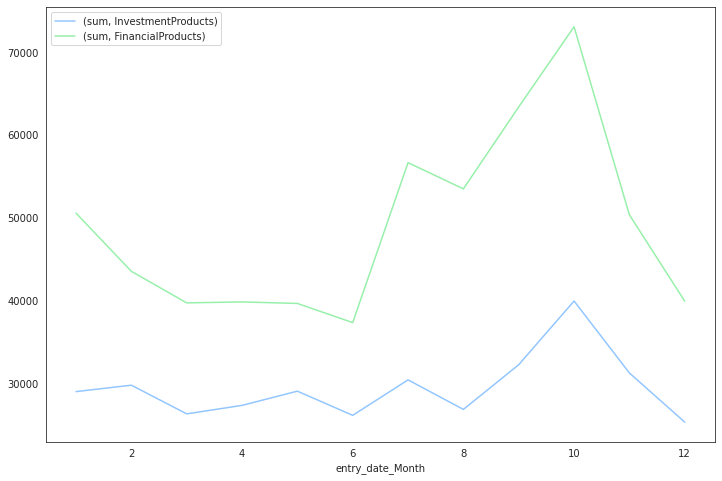

In [ ]:
plt.figure(figsize = [12,8])
tabla[('sum','InvestmentProducts')].plot(kind = 'line')
tabla[('sum','FinancialProducts')].plot(kind = 'line')
plt.legend()
plt.show()

##### Ventas de cuentas

La cuenta easyMoney, que es la más contratada por los clientes, tiene su mayor diferencia durante el 2º semestre de 2018 con el mayor volumen de contrataciones en octubre 2018. A nivel negocio parece estar relacionado con campañas que potencian este producto en ese periodo.
El resto de cuentas se mantienen a un ritmo más o menos constante.

In [ ]:
#Creamos una pivot table para almacenar las ventas de las cuentas.
ventas_cuentas = pd.pivot_table(df, index=["pk_partition_Year", "pk_partition_Month"],
                                values=["payroll_account", "em_acount", "em_account_p", "emc_account", "HasAccount"],
                                aggfunc=[sum, len, np.median])

In [ ]:
ventas_cuentas.drop((2018, 1), inplace=True)

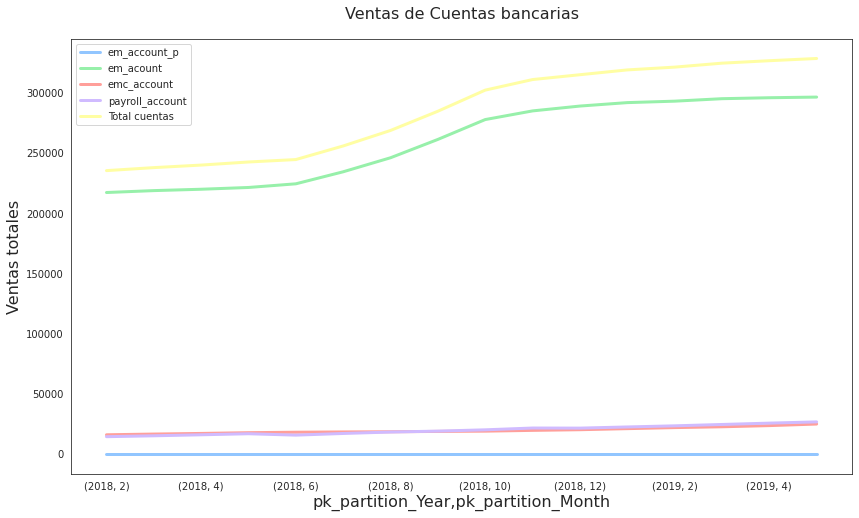

In [ ]:
plt.figure(figsize=[14, 8])
plt.title("Ventas de Cuentas bancarias", fontsize=16, pad=20)
plt.xlabel("Fecha de la venta", fontsize=16)
plt.ylabel("Ventas totales", fontsize=16)
ventas_cuentas[("sum", "em_account_p")].plot(kind="line", label="em_account_p", linewidth=3)
ventas_cuentas[("sum", "em_acount")].plot(kind="line", label="em_acount", linewidth=3)
ventas_cuentas[("sum", "emc_account")].plot(kind="line", label="emc_account", linewidth=3)
ventas_cuentas[("sum", "payroll_account")].plot(kind="line", label="payroll_account", linewidth=3)
ventas_cuentas[("sum", "HasAccount")].plot(kind="line", label="Total cuentas", linewidth=3)
plt.legend()
plt.show()


##### Ventas totales 

In [ ]:
# En primer lugar, creamos una pivot_table que nos permita almacenar los datos de las ventas

In [ ]:
gc.collect()

21537

In [ ]:
def get_last_sales_report(df: pd.DataFrame) -> pd.DataFrame:
    """
    Returns the sales of the last months
    :param df: Complete dataframe
    :return: last sales dataframe report
    """
    columns = ['pk_cid', 'pk_partition', 'short_term_deposit', 'loans', 'mortgage', 'funds', 'securities',
               'long_term_deposit', 'em_account_pp', 'credit_card', 'payroll', 'pension_plan', 'payroll_account',
               'emc_account', 'debit_card', 'em_account_p', 'em_acount']

    last_months = df["pk_partition"].unique()[-2:]
    old_clients_arr = df[df["pk_partition"] != last_months[1]]["pk_cid"].unique()

    last_months_df = df[df["pk_partition"].isin(last_months)][columns]
    last_months_df.set_index(["pk_cid", "pk_partition"], inplace=True)
    last_months_df.sort_index(inplace=True)

    _latest_sales = last_months_df.sum(axis=1).reset_index(name="product_counter")
    _latest_sales["pk_partition"] = _latest_sales["pk_partition"].dt.strftime('%Y-%m-%d')

    last_sales = pd.get_dummies(_latest_sales, columns=["pk_partition"])
    last_sales.sort_values("pk_cid", inplace=True)
    last_sales["is_old_client"] = last_sales["pk_partition_2019-04-28"]
    last_sales["pk_partition_2019-04-28"] = last_sales["pk_partition_2019-04-28"] * last_sales["product_counter"]
    last_sales["pk_partition_2019-05-28"] = last_sales["pk_partition_2019-05-28"] * last_sales["product_counter"]

    sales = last_sales.groupby("pk_cid").agg(
        products_penultimate_month=("pk_partition_2019-04-28", sum),
        products_last_month=("pk_partition_2019-05-28", sum)
    ).reset_index()

    sales["is_new_client"] = ~sales["pk_cid"].isin(old_clients_arr)
    sales["is_new_client"] = sales["is_new_client"].astype(int)

    sales["new_sale"] = sales["products_penultimate_month"] < sales["products_last_month"]
    sales["new_sale"] = sales["new_sale"].astype(int)

    return sales


In [ ]:
last_sales = get_last_sales_report(df)
last_sales["new_products_sold"] = last_sales["products_last_month"] - last_sales["products_penultimate_month"]
last_sales

,pk_cid,products_penultimate_month,products_last_month,is_new_client,new_sale,new_products_sold
0,16063,0.0,0.0,0,0,0.0
1,16203,1.0,1.0,0,0,0.0
2,16502,2.0,2.0,0,0,0.0
3,17457,2.0,3.0,0,1,1.0
4,17590,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...
444208,1553685,0.0,0.0,1,0,0.0
444209,1553686,0.0,0.0,1,0,0.0
444210,1553687,0.0,0.0,1,0,0.0
444211,1553688,0.0,0.0,1,0,0.0


In [ ]:
condition_no_sales = last_sales['new_products_sold'] > 0
sales_new_clients = last_sales[(condition_no_sales) & (last_sales["is_new_client"] == 1)]
sales_old_clients = last_sales[(condition_no_sales) & (last_sales["is_new_client"] == 0)]
print(f"""
* Cantidad de nuevos ventas en el ultimo mes: {sum(last_sales['new_sale'])}
    - Clientes nuevos: {len(sales_new_clients)}
    - Clientes frecuentes: {len(sales_old_clients)}

* Cantidad de productos vendidos el ultimo mes: {sum(last_sales[condition_no_sales]['new_products_sold'])}
    - Clientes nuevos: {sum(sales_new_clients['new_products_sold'])}
    - Clientes frecuentes: {sum(sales_old_clients['new_products_sold'])}
""")


* Cantidad de nuevos ventas en el ultimo mes: 13373
    - Clientes nuevos: 1596
    - Clientes frecuentes: 11777

* Cantidad de productos vendidos el ultimo mes: 16820.0
    - Clientes nuevos: 1717.0
    - Clientes frecuentes: 15103.0

